Trenowanie i sprawdzanie modelu na podstawie danych


In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('train/train.tsv', delimiter='\t', header=None)

X = data.iloc[:, [6, 8]]
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(11)

y = data.iloc[:, 0]

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_normalized, y)





LinearRegression()

Predykcja modelu:

In [39]:

dane = pd.read_csv('dev-0/in.tsv', delimiter='\t', header=None)
dane = dane[[5,7]]
dane = dane.apply(pd.to_numeric, errors='coerce')
dane = dane.fillna(11)
#print(dane[[5, 7]])
scaler = MinMaxScaler()
scaler.fit(dane)
dane_normalized = scaler.transform(dane)
wynik = model.predict(dane_normalized)
wynik_df = pd.DataFrame(wynik)
wynik_df.to_csv('dev-0/out.tsv', sep='\t', index=False)

dane2 = pd.read_csv('Test-A/in.tsv', delimiter='\t', header=None)
dane2 = dane2[[5,7]]
dane2 = dane2.apply(pd.to_numeric, errors='coerce')
dane2 = dane2.fillna(11)
scaler = MinMaxScaler()
scaler.fit(dane2)
dane2_normalized = scaler.transform(dane)
wynik2 = model.predict(dane2_normalized)
wynik2_df = pd.DataFrame(wynik2)
wynik2_df.to_csv('Test-A/out.tsv', sep='\t', index=False)


Średni Błąd Kwadratowy (MSE): 23708536181.88
Średni Błąd Bezwzględny (MAE): 75896.46
R-kwadrat (R2): 0.67


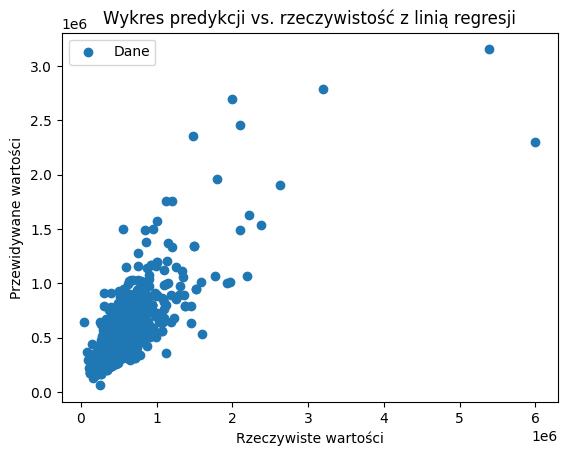

In [ ]:
from sklearn.metrics import mean_squared_error
 
y_pred = model.predict(X_normalized)
mse = mean_squared_error(y, y_pred)
print(f"Średni Błąd Kwadratowy (MSE): {mse:.2f}")

from sklearn.metrics import mean_absolute_error
 
mae = mean_absolute_error(y, y_pred)
print(f"Średni Błąd Bezwzględny (MAE): {mae:.2f}")

from sklearn.metrics import r2_score
 
r2 = r2_score(y, y_pred)
print(f"R-kwadrat (R2): {r2:.2f}")

import matplotlib.pyplot as plt
 
plt.scatter(y, y_pred, label="Dane")

plt.xlabel("Rzeczywiste wartości")
plt.ylabel("Przewidywane wartości")
plt.title("Wykres predykcji vs. rzeczywistość z linią regresji")
plt.legend()
plt.show()